<a href="https://colab.research.google.com/github/Avinashbairagi/Text_summarization_LSTM/blob/main/Book_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 835.9 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
data = pd.read_csv("/content/sample.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,id,title,publication,author,date,year,month,url,content
0,0,0,17283,House Republicans Fret About Winning Their Health Care Suit - The New York Times,New York Times,Carl Hulse,2016-12-31,2016,12,NaN,WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could ch...
1,1,1,17284,Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,NaN,"After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from windows and see crime scenes gone cold: a band of yellow police tape blowing in the br..."
2,2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times",New York Times,Margalit Fox,2017-01-06,2017,1,NaN,"When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s s..."
3,3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times",New York Times,William McDonald,2017-04-10,2017,4,NaN,"Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016 — consider Muhammad Ali and Arnold Palmer in sports and ..."
4,4,4,17287,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times,New York Times,Choe Sang-Hun,2017-01-02,2017,1,NaN,"SEOUL, South Korea — North Korea’s leader, Kim said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile — a bold sta..."


# Information about dataset
Let us look at datatypes and shape of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2200 non-null   int64  
 1   Unnamed: 0.1  2200 non-null   int64  
 2   id            2200 non-null   int64  
 3   title         2200 non-null   object 
 4   publication   2200 non-null   object 
 5   author        2190 non-null   object 
 6   date          2200 non-null   object 
 7   year          2200 non-null   int64  
 8   month         2200 non-null   int64  
 9   url           0 non-null      float64
 10  content       2200 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 189.2+ KB


# Required Featureds

In [ ]:
df1 = pd.DataFrame(zip(data["title"].apply(lambda x:re.sub(r"\s-.*",'',x) ) ,data["content"]), columns=["Summary","Text"])
df1

,Summary,Text
0,House Republicans Fret About Winning Their Health Care Suit,WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could ch...
1,Rift Between Officers and Residents as Killings Persist in South Bronx,"After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from windows and see crime scenes gone cold: a band of yellow police tape blowing in the br..."
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106","When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s s..."
3,"Among Deaths in 2016, a Heavy Toll in Pop Music","Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016 — consider Muhammad Ali and Arnold Palmer in sports and ..."
4,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile,"SEOUL, South Korea — North Korea’s leader, Kim said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile — a bold sta..."
...,...,...
2195,Trump Talks Tough on U.S.-China Trade but Delays Real Action,"SHANGHAI — President Trump appeared to follow through on Friday on his promises to get tough on trade with China, less than a week before he is to meet with President Xi Jinping of China. In tw..."
2196,"Mexico Welcomes Possible U.S. Shift on Nafta, but Mistrust of Trump Persists","MEXICO CITY — For months, President Trump warned Mexicans that the Nafta they had enjoyed for decades would soon be a thing of the past. He cowed manufacturers into shifting their investments f..."
2197,The Roots of the Battle Over Neil Gorsuch: ‘They Started It’,"WASHINGTON — There was no filibuster for Clarence Thomas, whose Supreme Court confirmation hearings provoked a national uproar over sex, race and the behavior of powerful men. Antonin Scalia, f..."
2198,"2 Sue Trump and U.S. Officials, Claiming They Are on ‘Kill List’","BEIRUT, Lebanon — Two men who have reported extensively on jihadists and their activities have sued President Trump and members of his administration based on their belief that the government h..."


In [ ]:
# df1["Summary"][3]

# Preprocessing

Performing basic preprocessing steps is very important before we get to the model building part. Using messy and uncleaned text data is a potentially disastrous move. So in this step, we will drop all the unwanted symbols, characters, etc. from the text that do not affect the objective of our problem.

Here is the dictionary that we will use for expanding the contractions:

In [ ]:
contraction_mapping = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"doesn’t": "does not",
"don't": "do not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’re": "you are",
"you’ve": "you have",
}

We will perform the below preprocessing tasks for our data:

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords

8.Remove short words

Let’s define the function:

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
#call the function
cleaned_summary = []
for t in df1['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [ ]:
cleaned_summary[:10]

['house republicans fret about winning their health care suit',
 'rift between officers and residents as killings persist in south bronx',
 'tyrus wong bambi artist thwarted by racial bias dies at',
 'among deaths in heavy toll in pop music',
 'kim jong un says north korea is preparing to test long range missile',
 'sick with cold queen elizabeth misses new year service',
 'taiwan president accuses china of renewed intimidation',
 'after the biggest loser their bodies fought to regain weight',
 'first mixtape then romance',
 'calling on angels while enduring the trials of job']

In [ ]:
cleaned_text = []
for t in df1['Text']:
    cleaned_text.append(text_cleaner(t,1))

In [ ]:
df1['cleaned_text']=cleaned_text
df1['cleaned_summary']=cleaned_summary

In [ ]:
df1.head()

,Summary,Text,cleaned_text,cleaned_summary
0,House Republicans Fret About Winning Their Health Care Suit,WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could ch...,washington congressional republicans have new fear when it comes to their health care lawsuit against the obama administration they might win the incoming trump administration could choose to no l...,house republicans fret about winning their health care suit
1,Rift Between Officers and Residents as Killings Persist in South Bronx,"After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from windows and see crime scenes gone cold: a band of yellow police tape blowing in the br...",after the bullet shells get counted the blood dries and the votive candles burn out people peer down from windows and see crime scenes gone cold band of yellow police tape blowing in the breeze th...,rift between officers and residents as killings persist in south bronx
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106","When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s s...",when walt disney bambi opened in critics praised its spare haunting visual style vastly different from anything disney had done before but what they did not know was that the film striking appeara...,tyrus wong bambi artist thwarted by racial bias dies at
3,"Among Deaths in 2016, a Heavy Toll in Pop Music","Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016 — consider Muhammad Ali and Arnold Palmer in sports and ...",death may be the great equalizer but it is not necessarily evenhanded of all the fields of endeavor that suffered mortal losses in consider muhammad ali and arnold palmer in sports and the hollywo...,among deaths in heavy toll in pop music
4,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile,"SEOUL, South Korea — North Korea’s leader, Kim said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile — a bold sta...",seoul south korea north korea leader kim said on sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile bold statement less than m...,kim jong un says north korea is preparing to test long range missile


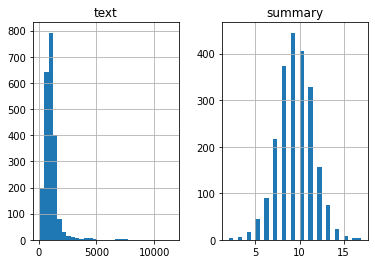

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df1['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df1['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
cnt=0
for i in df1['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(df1['cleaned_summary']))

0.9972727272727273


In [ ]:
cnt=0
for i in df1['cleaned_text']:
    if(len(i.split())<=2500):
        cnt=cnt+1
print(cnt/len(df1['cleaned_text']))

0.9763636363636363


We observe that 99% of the summaries have length below 15. So, we can fix maximum length of summary to 15.

97% of the Text have length below 2500. So, we can fix maximum length of Text to 2500

Let us fix the maximum length of review to 2500 and Summary 15

In [ ]:
max_text_len= 2500
max_summary_len=100

Let us select the reviews and summaries whose length falls below or equal to ***max_text_len*** and ***max_summary_len***

In [ ]:
cleaned_text =np.array(df1['cleaned_text'])
cleaned_summary=np.array(df1['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df

,text,summary
0,washington congressional republicans have new fear when it comes to their health care lawsuit against the obama administration they might win the incoming trump administration could choose to no l...,house republicans fret about winning their health care suit
1,when walt disney bambi opened in critics praised its spare haunting visual style vastly different from anything disney had done before but what they did not know was that the film striking appeara...,tyrus wong bambi artist thwarted by racial bias dies at
2,death may be the great equalizer but it is not necessarily evenhanded of all the fields of endeavor that suffered mortal losses in consider muhammad ali and arnold palmer in sports and the hollywo...,among deaths in heavy toll in pop music
3,seoul south korea north korea leader kim said on sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile bold statement less than m...,kim jong un says north korea is preparing to test long range missile
4,london queen elizabeth ii who has been battling cold for more than week missed new year day church service at her country estate in sandringham buckingham palace said on sunday week earlier the qu...,sick with cold queen elizabeth misses new year service
...,...,...
2143,shanghai president trump appeared to follow through on friday on his promises to get tough on trade with china less than week before he is to meet with president xi jinping of china in two executi...,trump talks tough on china trade but delays real action
2144,mexico city for months president trump warned mexicans that the nafta they had enjoyed for decades would soon be thing of the past he cowed manufacturers into shifting their investments from mexic...,mexico welcomes possible shift on nafta but mistrust of trump persists
2145,washington there was no filibuster for clarence thomas whose supreme court confirmation hearings provoked national uproar over sex race and the behavior of powerful men antonin scalia for generati...,the roots of the battle over neil gorsuch they started it
2146,beirut lebanon two men who have reported extensively on jihadists and their activities have sued president trump and members of his administration based on their belief that the government has put...,sue trump and officials claiming they are on kill list


Remember to add the START and END special tokens at the beginning and end of the summary. Here, I have chosen sostok and eostok as START and END tokens

Note: Be sure that the chosen special tokens never appear in the summary

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
df['summary'][0]

'sostok house republicans fret about winning their health care suit eostok'

We are getting closer to the model building part. Before that, we need to split our dataset into a training and validation set. We’ll use 90% of the dataset as the training data and evaluate the performance on the remaining 10% (holdout set):

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

#Preparing the Tokenizer

A tokenizer builds the vocabulary and converts a word sequence to an integer sequence. Go ahead and build tokenizers for text and summary:

#Text Tokenizer

pad_sequences


In [ ]:
from keras.preprocessing.text import Tokenizer 
# from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
# x_tokenizer.word_counts.items()

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1                      
    tot_freq=tot_freq+value               
    if(value<thresh):                  
        cnt=cnt+1                       
        freq=freq+value
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 56.647242455775235
Total Coverage of rare words: 2.1935559077147007


Remember:

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

Let us define the tokenizer with top most common words for reviews.

In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

20832

# Summary Tokenizer

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

#Rarewords and its Coverage

Let us look at the proportion rare words and its total coverage in the entire summary

Here, I am defining the threshold to be 6 which means word whose count is below 6 is considered as a rare word

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 90.24802705749718
Total Coverage of rare words: 35.474745631245156


In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [ ]:
y_voc

520

Let us check whether word count of start token is equal to length of the training data

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)   

(1933, 1933)

Here, I am deleting the rows that contain only **START** and **END** tokens

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)
y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)


In [ ]:
x_tr.shape
y_tr.shape

(1928, 100)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
y_val.shape
x_val.shape

(213, 2500)

# Model Building


Model building
We are finally at the model building part. But before we do that, we need to familiarize ourselves with a few terms which are required prior to building the model.

Return Sequences = True: When the return sequences parameter is set to True, LSTM produces the hidden state and cell state for every timestep

Return State = True: When return state = True, LSTM produces the hidden state and cell state of the last timestep only

Initial State: This is used to initialize the internal states of the LSTM for the first timestep

Stacked LSTM: Stacked LSTM has multiple layers of LSTM stacked on top of each other. This leads to a better representation of the sequence. I encourage you to experiment with the multiple layers of the LSTM stacked on top of each other (it’s a great way to learn this)

Here, we are building a 3 stacked LSTM for the encoder:

In [ ]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
# plt.style.use(‘fivethirtyeight’)

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,TimeDistributed


In [ ]:
from keras import backend as K 
K.clear_session()
from attention import AttentionLayer

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))   # Input layer

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2500)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 2500, 100)    2083200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 2500, 300),  481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

I am using sparse categorical **cross-entropy** as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Remember the concept of early stopping? It is used to stop training the neural network at the right time by monitoring a user-specified metric. Here, I am monitoring the validation loss (val_loss). Our model will stop training once the validation loss increases:

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
print(x_tr.shape)
print(y_tr[:,:-1].shape)
print(y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:].shape)

(1928, 2500)
(1928, 99)
(1928, 99, 1)


In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=32, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# target_word_index

# Interface

Set up the inference for the encoder and decoder:



In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
decoder_model.summary()


We are defining a function below which is the implementation of the inference process

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")